In [7]:
import os

pdf_path = "human-nutrition-text.pdf"

if os.path.exists(pdf_path):
    print(f"Using existing file: {pdf_path}")
else:
    raise FileNotFoundError(
        f"{pdf_path} not found. Please place the PDF in the data/ folder."
    )


Using existing file: human-nutrition-text.pdf


In [9]:
import fitz 
from tqdm import tqdm

def text_formatter(text: str) -> str:
    """Performs minor formatting on extracted text."""
    cleaned_text = text.replace("\n", " ").strip()
    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    """
    Opens a PDF file, reads text page by page, and returns structured page data.

    Args:
        pdf_path (str): Path to the local PDF file

    Returns:
        list[dict]: List containing page text and statistics
    """
    doc = fitz.open(pdf_path)
    pages_and_texts = []

    for page_number, page in tqdm(enumerate(doc), total=len(doc)):
        text = page.get_text()
        text = text_formatter(text)

        # Skip empty pages
        if not text:
            continue

        pages_and_texts.append({
            "page_number": page_number - 41,  # PDF content starts at page 42
            "page_char_count": len(text),
            "page_word_count": len(text.split()),
            "page_sentence_count_raw": text.count("."),
            "page_token_count": len(text) // 4,  # ~1 token ≈ 4 characters
            "text": text
        })

    return pages_and_texts

# Run
pages_and_texts = open_and_read_pdf(pdf_path)

# Preview first two pages
pages_and_texts[:2]


100%|██████████| 1208/1208 [00:00<00:00, 1303.61it/s]


[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 0,
  'page_token_count': 7,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -39,
  'page_char_count': 320,
  'page_word_count': 42,
  'page_sentence_count_raw': 0,
  'page_token_count': 80,
  'text': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE'}]

In [12]:
import random

random.sample(pages_and_texts, k=3)


[{'page_number': 834,
  'page_char_count': 1642,
  'page_word_count': 228,
  'page_sentence_count_raw': 24,
  'page_token_count': 410,
  'text': 'their infants while taking antiretroviral medications to lower the  risk of transmission.23 In any case, combination feeding (formula  and breastmilk together) is not recommended for mothers who are  HIV positive because the risk of transmitting HIV to the infant is  higher than either breastfeeding or formula feeding alone.  Breastfeeding also is not recommended for women undergoing  radiation or chemotherapy treatment for cancer. Additionally, if an  infant is diagnosed with galactosemia, meaning an inability to  process the simple sugar galactose, the child must be on a  galactose-free diet, which excludes breast milk. This genetic  disorder is a very rare condition, however, and only affects 1 in  thirty- to sixty-thousand newborns.24 When breastfeeding is  contraindicated for any reason, feeding a baby formula enables  parents and caregi

In [13]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()


,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,0,7,Human Nutrition: 2020 Edition
1,-39,320,42,0,80,Human Nutrition: 2020 Edition UNIVERSITY OF ...
2,-38,212,30,2,53,Human Nutrition: 2020 Edition by University of...
3,-37,797,116,2,199,Contents Preface University of Hawai‘i at Mā...
4,-36,976,144,2,244,Lifestyles and Nutrition University of Hawai‘...


In [14]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1179.00,1179.00,1179.00,1179.00,1179.00
mean,561.27,1176.24,176.20,13.50,293.67
std,348.90,537.14,83.18,9.43,134.29
min,-41.00,17.00,3.00,0.00,4.00
25%,258.50,789.00,117.00,7.00,196.50
50%,561.00,1243.00,187.00,12.00,310.00
75%,861.50,1611.00,240.00,18.00,402.50
max,1166.00,2308.00,393.00,81.00,577.00


In [15]:
from spacy.lang.en import English

nlp = English()

nlp.add_pipe("sentencizer")

doc = nlp("This is a sentence. This another sentence.")
assert len(list(doc.sents)) == 2

list(doc.sents)

[This is a sentence., This another sentence.]

In [16]:
from tqdm import tqdm

for item in tqdm(pages_and_texts):
    doc = nlp(item["text"])
    sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
    item["sentences"] = sentences
    item["page_sentence_count_spacy"] = len(sentences)

100%|██████████| 1179/1179 [00:01<00:00, 774.36it/s]


In [18]:
random.sample(pages_and_texts, k=1)

[{'page_number': 120,
  'page_char_count': 1573,
  'page_word_count': 245,
  'page_sentence_count_raw': 12,
  'page_token_count': 393,
  'text': 'The Skeletal System  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  Bone Structure and Function  Your bones are stronger than reinforced concrete. Bone tissue is  a composite of fibrous strands of collagen (a type of protein) that  resemble the steel rebar in concrete and a hardened mineralized  matrix that contains large amounts of calcium, just like concrete.  But this is where the similarities end. Bone outperforms reinforced  concrete by several orders of magnitude in compression and  tension strength tests. Why? The microarchitecture of bone is  complex and built to withstand extreme forces. Moreover, bone is  a living tissue that is continuously breaking down and forming new  bone to adapt to mechanical stresses.  Why Is the Skeletal System Important?  The human skeleton consists of

In [19]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)


,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1179.00,1179.00,1179.00,1179.00,1179.00,1179.00
mean,561.27,1176.24,176.20,13.50,293.67,10.57
std,348.90,537.14,83.18,9.43,134.29,6.16
min,-41.00,17.00,3.00,0.00,4.00,1.00
25%,258.50,789.00,117.00,7.00,196.50,5.00
50%,561.00,1243.00,187.00,12.00,310.00,11.00
75%,861.50,1611.00,240.00,18.00,402.50,15.00
max,1166.00,2308.00,393.00,81.00,577.00,28.00


In [20]:
from tqdm import tqdm

num_sentence_chunk_size = 10

def split_list(input_list, slice_size):
    return [
        input_list[i:i + slice_size]
        for i in range(0, len(input_list), slice_size)
    ]

for item in tqdm(pages_and_texts):
    chunks = split_list(item["sentences"], num_sentence_chunk_size)
    item["sentence_chunks"] = chunks
    item["num_chunks"] = len(chunks)


100%|██████████| 1179/1179 [00:00<00:00, 573675.69it/s]


In [21]:
random.sample(pages_and_texts, k=1)


[{'page_number': 42,
  'page_char_count': 1553,
  'page_word_count': 223,
  'page_sentence_count_raw': 17,
  'page_token_count': 388,
  'text': 'Type  Description  Example  Notes  Epidemiological  Observational  study of  populations  around the  world and the  impact of  nutrition on  health.  Diets with a high  consumption of  saturated fat are  associated with an  increased risk of  heart attacks.  Does not  determine  cause-and-effect  relationships.  Intervention  Clinical Trials  Scientific  investigations  where a  variable is  changed  between  groups.  Testing the effect  of different diets  on blood pressure.  One group  consumes an  American diet,  group 2 eats a diet  rich in fruits and  vegetables, and  group 3 eats a  combination of  groups 1 and 2.  If done correctly,  it does  determine  cause-and-effect  relationships.  Randomized  Clinical Trials  Participants  are assigned  by chance to  separate  groups that  compare  different  treatments.  Neither the  researchers

In [22]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)


,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1179.00,1179.00,1179.00,1179.00,1179.00,1179.00,1179.00
mean,561.27,1176.24,176.20,13.50,293.67,10.57,1.56
std,348.90,537.14,83.18,9.43,134.29,6.16,0.61
min,-41.00,17.00,3.00,0.00,4.00,1.00,1.00
25%,258.50,789.00,117.00,7.00,196.50,5.00,1.00
50%,561.00,1243.00,187.00,12.00,310.00,11.00,2.00
75%,861.50,1611.00,240.00,18.00,402.50,15.00,2.00
max,1166.00,2308.00,393.00,81.00,577.00,28.00,3.00


In [23]:
import re
from tqdm import tqdm

pages_and_chunks = []

for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:

        # Join sentences into a single chunk
        joined_sentence_chunk = " ".join(sentence_chunk).strip()

        # Normalize whitespace
        joined_sentence_chunk = re.sub(r'\s+', ' ', joined_sentence_chunk)

        # Fix missing space after full stop
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)

        # Skip chunks with very few words (low information)
        if len(joined_sentence_chunk.split()) < 10:
            continue

        pages_and_chunks.append({
            "page_number": item["page_number"],
            "sentence_chunk": joined_sentence_chunk,
            "chunk_char_count": len(joined_sentence_chunk),
            "chunk_word_count": len(joined_sentence_chunk.split()),
            "chunk_token_count": len(joined_sentence_chunk) // 4
        })

len(pages_and_chunks)

100%|██████████| 1179/1179 [00:00<00:00, 14494.66it/s]


1763

In [24]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1763.00,1763.00,1763.00,1763.00
mean,581.45,765.36,117.72,190.96
std,349.40,432.48,69.08,108.12
min,-39.00,48.00,10.00,12.00
25%,279.00,367.00,53.00,91.00
50%,580.00,777.00,120.00,194.00
75%,891.00,1130.00,175.00,282.00
max,1166.00,1831.00,298.00,457.00


In [25]:
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(
        f'Chunk token count: {row[1]["chunk_token_count"]} | '
        f'Text: {row[1]["sentence_chunk"]}'
    )


Chunk token count: 27 | Text: Figure 15.1 reused “Silohuette of Three People” by photo- nic.co.uk nic / Unsplash License 1158 | Attributions
Chunk token count: 19 | Text: 2018). Centers for Disease Control and 998 | The Causes of Food Contamination
Chunk token count: 29 | Text: 2. Lacto-vegetarian. This type of vegetarian diet includes dairy products but not eggs. Lifestyles and Nutrition | 27
Chunk token count: 12 | Text: PART VI CHAPTER 6. PROTEIN Chapter 6. Protein | 357
Chunk token count: 21 | Text: Centers for Disease Control and Prevention. http://www.cdc.gov/nutrition/ Iron | 661


In [26]:
pages_and_chunks_over_min_token_len = df[
    df["chunk_token_count"] > min_token_length
].to_dict(orient="records")

pages_and_chunks_over_min_token_len[:2]


[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52}]

In [40]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1673.00,1673.00,1673.00,1673.00
mean,580.13,801.60,123.33,200.02
std,349.81,413.94,66.42,103.49
min,-39.00,124.00,10.00,31.00
25%,277.00,424.00,63.00,106.00
50%,578.00,819.00,126.00,204.00
75%,888.00,1144.00,178.00,286.00
max,1166.00,1831.00,298.00,457.00


### Embeddings

In [29]:
from langchain_ollama import OllamaEmbeddings

embedding_model = OllamaEmbeddings(
    model="nomic-embed-text"
)

sentences = [
    "Embedding models convert text into numerical vectors that capture semantic meaning.",
    "These vectors allow similarity search between pieces of text.",
    "Embeddings are a core component of retrieval augmented generation systems.",
    "Using high-quality embeddings improves document retrieval and answer accuracy."
]

embeddings = embedding_model.embed_documents(sentences)

for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding dimension:", len(embedding))
    print("Embedding (first 10 values):", embedding[:10])
    print("-" * 80)


Sentence: Embedding models convert text into numerical vectors that capture semantic meaning.
Embedding dimension: 768
Embedding (first 10 values): [-0.017361395, -0.00613115, -0.15467684, -0.06770106, 0.08077214, -0.009314766, -0.0007654746, -0.008295051, -0.064255394, 0.015148232]
--------------------------------------------------------------------------------
Sentence: These vectors allow similarity search between pieces of text.
Embedding dimension: 768
Embedding (first 10 values): [0.019778606, 0.01573086, -0.17174672, -0.047626648, 0.002949353, -0.03832704, -0.009647556, -0.00392379, -0.07839255, -0.030252427]
--------------------------------------------------------------------------------
Sentence: Embeddings are a core component of retrieval augmented generation systems.
Embedding dimension: 768
Embedding (first 10 values): [-0.03694494, 0.055717584, -0.1701605, -0.085773826, 0.060150575, -0.011340222, -0.0035118216, -0.0026075332, -0.0023434951, 0.0071642776]
-----------------

In [30]:
single_sentence = "Yo! How cool are embeddings?"

single_embedding = embedding_model.embed_query(single_sentence)

print(f"Sentence: {single_sentence}")
print(f"Embedding dimension: {len(single_embedding)}")
print(f"Embedding (first 10 values): {single_embedding[:10]}")

Sentence: Yo! How cool are embeddings?
Embedding dimension: 768
Embedding (first 10 values): [-0.018448839, 0.066067606, -0.17542236, -0.051825114, 0.009322169, -0.017902464, -0.0047830897, -0.028804181, -0.021348387, -0.07752117]


In [ ]:
%%time

from langchain_ollama import OllamaEmbeddings

embedding_model = OllamaEmbeddings(model="nomic-embed-text")

texts = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

embeddings = embedding_model.embed_documents(texts)

for item, emb in zip(pages_and_chunks_over_min_token_len, embeddings):
    item["embedding"] = emb


CPU times: total: 281 ms
Wall time: 17.6 s


In [32]:
import pandas as pd

text_chunks_and_embeddings_df = pd.DataFrame(
    pages_and_chunks_over_min_token_len
)

embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

print(f"Saved embeddings to {embeddings_df_save_path}")

Saved embeddings to text_chunks_and_embeddings_df.csv


In [33]:
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77,"[-0.04978325, 0.033755608, -0.15829422, -0.003..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52,"[-0.011337994, -0.008631799, -0.14297198, 0.00..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,116,191,"[0.006175607, 0.07716456, -0.15992433, -0.0658..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,144,235,"[-0.0011170661, 0.038795847, -0.17877159, -0.0..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249,"[-0.0112672215, 0.061255645, -0.20187792, -0.0..."


### RAG

In [ ]:
import random
import torch
import numpy as np
import pandas as pd
import ast

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load CSV
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding column from string to list
text_chunks_and_embedding_df["embedding"] = (
    text_chunks_and_embedding_df["embedding"]
    .apply(ast.literal_eval)
)

# Convert to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

# Stack embeddings into torch tensor
embeddings = torch.tensor(
    np.array(text_chunks_and_embedding_df["embedding"].tolist()),
    dtype=torch.float32
).to(device)

embeddings.shape


torch.Size([1673, 768])

In [41]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77,"[-0.04978325, 0.033755608, -0.15829422, -0.003..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52,"[-0.011337994, -0.008631799, -0.14297198, 0.00..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,116,191,"[0.006175607, 0.07716456, -0.15992433, -0.0658..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,144,235,"[-0.0011170661, 0.038795847, -0.17877159, -0.0..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249,"[-0.0112672215, 0.061255645, -0.20187792, -0.0..."


In [42]:
embeddings[0]

tensor([-4.9783e-02,  3.3756e-02, -1.5829e-01, -3.3678e-03,  4.6541e-02,
         5.1790e-03,  2.7253e-02, -3.6247e-02,  3.2681e-02, -3.0644e-02,
        -5.3864e-02,  5.9575e-02,  4.7567e-02,  3.4447e-02,  2.7673e-02,
        -2.2422e-02, -3.0333e-02, -6.4020e-02, -4.1787e-02,  7.4088e-02,
         1.0264e-02, -1.2361e-02, -4.0355e-02, -4.4834e-02,  4.3350e-02,
         7.1074e-02,  5.1699e-03,  2.5060e-02,  1.5847e-02, -2.4484e-02,
         2.1089e-02, -3.9128e-02, -3.7860e-02, -6.9422e-02, -3.1534e-02,
        -2.2504e-02,  6.7605e-02, -1.7611e-02,  4.9335e-02, -2.8014e-02,
         5.7659e-02, -1.6703e-04,  1.7766e-02,  1.6573e-02,  5.0659e-02,
        -1.1549e-02,  3.8792e-02,  5.1007e-02,  4.7194e-02, -7.6085e-02,
        -3.5204e-02, -1.4331e-02,  7.1934e-02, -4.9635e-02,  2.4715e-02,
        -9.9012e-03, -4.0705e-02,  2.4334e-02, -4.0274e-02, -1.0336e-02,
         6.4295e-02,  5.8957e-02, -5.1246e-03,  2.7846e-02,  7.8014e-02,
        -1.4440e-02, -3.9219e-02,  5.6019e-02,  1.2

In [43]:
from langchain_ollama import OllamaEmbeddings

embedding_model = OllamaEmbeddings(
    model="nomic-embed-text"
)

In [44]:
import torch
import torch.nn.functional as F
from time import perf_counter as timer

# 1. Define the query
query = "macronutrients functions"
print(f"Query: {query}")

# 2. Embed the query using Ollama
query_embedding = embedding_model.embed_query(query)

# Convert query embedding to torch tensor
query_embedding = torch.tensor(query_embedding, dtype=torch.float32).to(device)

# Add batch dimension: (1, 768)
query_embedding = query_embedding.unsqueeze(0)

# 3. Compute cosine similarity
start_time = timer()

# Normalize embeddings (important!)
query_embedding_norm = F.normalize(query_embedding, p=2, dim=1)
embeddings_norm = F.normalize(embeddings, p=2, dim=1)

# Cosine similarity: (1, N)
cosine_scores = torch.matmul(query_embedding_norm, embeddings_norm.T)[0]

end_time = timer()

print(
    f"Time taken to score {embeddings.shape[0]} embeddings: "
    f"{end_time - start_time:.5f} seconds"
)

# 4. Top-k results
top_k = 5
top_results = torch.topk(cosine_scores, k=top_k)

top_results


Query: macronutrients functions
Time taken to score 1673 embeddings: 0.01750 seconds


torch.return_types.topk(
values=tensor([0.7316, 0.6717, 0.6687, 0.6586, 0.6581]),
indices=tensor([  42, 1231,  380,  799,  670]))

In [45]:
import torch
import torch.nn.functional as F
from time import perf_counter as timer

# Create 100x more fake embeddings
scale = 100
larger_embeddings = torch.randn(
    embeddings.shape[0] * scale,
    embeddings.shape[1],
    device=device
)

print(f"Embeddings shape: {larger_embeddings.shape}")

# Normalize
query_emb_norm = F.normalize(query_embedding, p=2, dim=1)
larger_emb_norm = F.normalize(larger_embeddings, p=2, dim=1)

# Time similarity
start_time = timer()
scores = torch.matmul(query_emb_norm, larger_emb_norm.T)
end_time = timer()

print(
    f"Time taken to score {larger_embeddings.shape[0]} embeddings: "
    f"{end_time - start_time:.5f} seconds"
)


Embeddings shape: torch.Size([167300, 768])
Time taken to score 167300 embeddings: 0.03996 seconds


In [46]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [47]:
print(f"Query: '{query}'\n")
print("Results:")

# Loop through similarity scores and indices
for score, idx in zip(top_results.values, top_results.indices):
    print(f"Score: {score:.4f}")
    
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")


Query: 'macronutrients functions'

Results:
Score: 0.7316
Text:
Macronutrients Nutrients that are needed in large amounts are called
macronutrients. There are three classes of macronutrients: carbohydrates,
lipids, and proteins. These can be metabolically processed into cellular energy.
The energy from macronutrients comes from their chemical bonds. This chemical
energy is converted into cellular energy that is then utilized to perform work,
allowing our bodies to conduct their basic functions. A unit of measurement of
food energy is the calorie. On nutrition food labels the amount given for
“calories” is actually equivalent to each calorie multiplied by one thousand. A
kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with
the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a
macronutrient in the sense that you require a large amount of it, but unlike the
other macronutrients, it does not yield calories. Carbohydrates Carbohydrates
are 

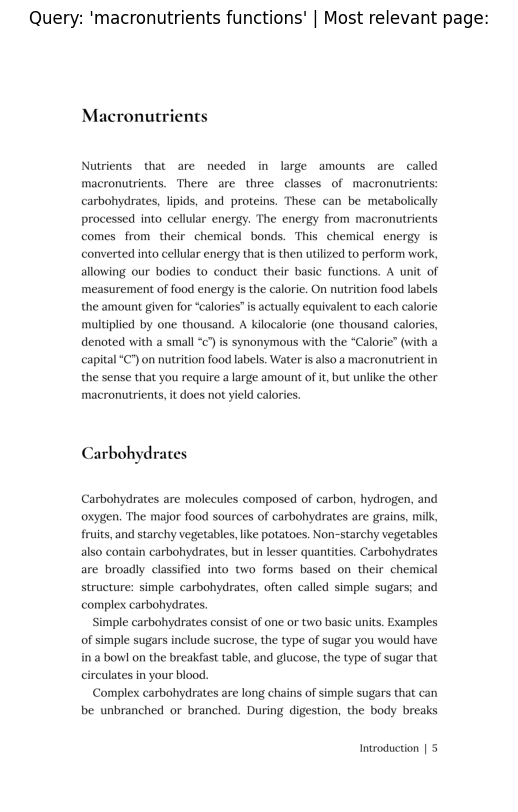

In [49]:
import fitz

# Open PDF and load target page
pdf_path = "human-nutrition-text.pdf" # requires PDF to be downloaded
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41) # number of page (our doc starts page numbers on page 41)

# Get the image of the page
img = page.get_pixmap(dpi=300)

doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv, 
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') # Turn off axis
plt.show()

In [51]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="mistral",
    temperature=0.7
)

In [52]:
import torch
import torch.nn.functional as F
from time import perf_counter as timer

def retrieve_relevant_resources(
    query: str,
    embeddings: torch.Tensor,
    embedding_model,
    n_resources_to_return: int = 5,
    print_time: bool = True
):
    # Embed query with Ollama
    query_embedding = embedding_model.embed_query(query)
    query_embedding = torch.tensor(query_embedding, dtype=torch.float32).to(device)
    query_embedding = query_embedding.unsqueeze(0)

    # Normalize
    query_norm = F.normalize(query_embedding, p=2, dim=1)
    embeddings_norm = F.normalize(embeddings, p=2, dim=1)

    start_time = timer()
    scores = torch.matmul(query_norm, embeddings_norm.T)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Similarity search over {embeddings.shape[0]} chunks took {end_time-start_time:.5f}s")

    top_scores, top_indices = torch.topk(scores, k=n_resources_to_return)

    return top_scores, top_indices


In [53]:
import textwrap

def print_wrapped(text, width=80):
    print(textwrap.fill(text, width))

In [54]:
def print_top_results_and_scores(
    query: str,
    embeddings: torch.Tensor,
    pages_and_chunks: list,
    embedding_model,
    n_resources_to_return: int = 5
):
    scores, indices = retrieve_relevant_resources(
        query=query,
        embeddings=embeddings,
        embedding_model=embedding_model,
        n_resources_to_return=n_resources_to_return
    )

    print(f"\nQuery: {query}\n")
    print("Results:\n")

    for score, idx in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[idx]['page_number']}\n")


In [55]:
def prompt_formatter(query: str, context_items: list[dict]) -> str:
    context = "\n\n".join(
        f"- {item['sentence_chunk']}" for item in context_items
    )

    prompt = f"""
You are a helpful nutrition expert.

Use ONLY the context below to answer the question.
Be explanatory and precise.

Context:
{context}

Question:
{query}

Answer:
"""
    return prompt.strip()

In [56]:
def ask(
    query: str,
    embeddings: torch.Tensor,
    pages_and_chunks: list,
    embedding_model,
    llm,
    top_k: int = 5,
    temperature: float = 0.7,
    return_context: bool = False
):
    # Retrieve
    scores, indices = retrieve_relevant_resources(
        query=query,
        embeddings=embeddings,
        embedding_model=embedding_model,
        n_resources_to_return=top_k
    )

    context_items = [pages_and_chunks[i] for i in indices]

    prompt = prompt_formatter(
        query=query,
        context_items=context_items
    )

    # Ask Mistral
    response = llm.invoke(prompt)

    if return_context:
        return response.content, context_items

    return response.content


In [57]:
queries = [
    "What are the macronutrients and their functions?",
    "What are symptoms of pellagra?",
    "How does saliva help digestion?",
    "What are water soluble vitamins?"
]

for q in queries:
    print("="*80)
    print(f"QUERY: {q}\n")
    answer = ask(
        query=q,
        embeddings=embeddings,
        pages_and_chunks=pages_and_chunks,
        embedding_model=embedding_model,
        llm=llm
    )
    print_wrapped(answer)
    print("\n")


QUERY: What are the macronutrients and their functions?

[INFO] Similarity search over 1673 chunks took 0.00019s
 The macronutrients are carbohydrates, lipids, proteins, and water.  1.
Carbohydrates: They are molecules composed of carbon, hydrogen, and oxygen. They
serve as a primary source of energy for the body, providing glucose which cells
use for immediate energy or store as glycogen for later use. Excess
carbohydrates can be stored as fat.  2. Lipids: Also known as fats, they are
crucial for energy storage, insulation, and absorption of vitamins. They provide
more than double the amount of energy per gram compared to proteins or
carbohydrates.  3. Proteins: Crucial for the nourishment, renewal, and
continuance of life. Proteins provide structure to bones, muscles, and skin, and
play a role in conducting most of the chemical reactions that take place in the
body. They also serve as building blocks for enzymes, hormones, and antibodies.
4. Water: Although not a source of energy, wa